<a href="https://colab.research.google.com/github/aliburakcan1/Earthquake/blob/master/setur_sikayetvar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cloudscraper for passing cloudflare captcha and BeautifulSoup for html parsing

In [1]:
!pip install cloudscraper
import cloudscraper
try: 
    from BeautifulSoup import BeautifulSoup
except ImportError:
    from bs4 import BeautifulSoup

     |████████████████████████████████| 96 kB 1.7 MB/s 
     |████████████████████████████████| 54 kB 1.5 MB/s 




# Firstly, get all complaints urls by looping over pages


In [2]:
scraper = cloudscraper.create_scraper()
all_complaints = []
for i in range(1, 16):
    html = scraper.get(f"https://www.sikayetvar.com/setur-turizm?page={i}").text
    parsed_html = BeautifulSoup(html)
    for l in parsed_html.findAll('h2', attrs={'class':'complaint-title'}):
        try:
            all_complaints.append(l.find('a')['href'])
        except:
            pass
len(all_complaints)

302

# And then, according to the each url, fetch relevant informations about complaints

In [3]:
import time
title = []
view_count = []
solve_status = []
rating = []
supporters = []
posts_infos = []

for complain in all_complaints:
    page = f"https://www.sikayetvar.com/{complain}"
    html = scraper.get(page).text
    parsed_html = BeautifulSoup(html)
    print('Başlık:', parsed_html.find('div', attrs={'class':'story-title'}).find('h1').text)
    title.append(parsed_html.find('div', attrs={'class':'story-title'}).find('h1').text)

    #print('Görüntülenme Sayısı:', parsed_html.find('div', attrs={'class':'story-title'}).find('span', attrs={'class':'count'}).text)
    view_count.append(parsed_html.find('div', attrs={'class':'story-title'}).find('span', attrs={'class':'count'}).text)
    #print('Çözülme Durumu:', len(parsed_html.find('section',
    #             attrs={'class': 'post-setting'}).find('div',
    #              attrs={'cmplnt-status'}).find('ul').findAll('li',
    #               attrs={'class':'complete'}))>1)
    
    solve_status.append(len(parsed_html.find('section',
                 attrs={'class': 'post-setting'}).find('div',
                  attrs={'cmplnt-status'}).find('ul').findAll('li',
                   attrs={'class':'complete'}))>1)

    try:
        #print('Rating:', len([i.find('img', attrs={'alt':'tam yıldız'}) for i in parsed_html.find('section',
        #            attrs={'class': 'post-setting'}).find('div',
        #              attrs={'class': 'rating star-rating'}).find('div',
        #                attrs={'class': 'rating-row'}).findAll('span',
        #                  attrs={'class': 'star-image'}) if i.find('img', attrs={'alt':'tam yıldız'}) != None])
        #                )
        rating.append(len([i.find('img', attrs={'alt':'tam yıldız'}) for i in parsed_html.find('section',
                    attrs={'class': 'post-setting'}).find('div',
                      attrs={'class': 'rating star-rating'}).find('div',
                        attrs={'class': 'rating-row'}).findAll('span',
                          attrs={'class': 'star-image'}) if i.find('img', attrs={'alt':'tam yıldız'}) != None]))
    except:
        rating.append(None)
        pass

    try:
        #print('Destekçiler:', parsed_html.find('div', attrs={'class': 'media-block'}).find('span',
        #            attrs={'class': 'total-support'}).text)
        supporters.append(parsed_html.find('div', attrs={'class': 'media-block'}).find('span',
                    attrs={'class': 'total-support'}).text)
    except:
        #print('Destekçisi yok')
        supporters.append(0)
        pass
    
    post_infos = []
    for l in parsed_html.findAll('div', attrs={'class': 'story-comment'}):
        #print('------------')
        #print(l)
        #print('------------')
        
        try:
            #print(l)
            
            #print('Üye:', l.find('div', attrs={'class':'profile-details'}).find('a')['href'])
            #
            #print('Post Time:', l.find('div', attrs={'class':'profile-details'}).find('span', attrs={'class':'post-time'})['title'])
            try:
                #print('Comment:', [i.text for i in l.find('div', attrs={'class':'card-text'}).findAll('p')])
                post = [i.text for i in l.find('div', attrs={'class':'card-text'}).findAll('p')]
            except:
                try:
                    #print('Comment:', [i.text for i in l.find('div', attrs={'class':'reply-cmnt-wrap'}).findAll('p')])
                    post = [i.text for i in l.find('div', attrs={'class':'reply-cmnt-wrap'}).findAll('p')]
                except:
                    try:
                        #print('Comment:', [i.text for i in l.find('div', attrs={'class':'comment-wrap'}).findAll('p')])
                        post = [i.text for i in l.find('div', attrs={'class':'comment-wrap'}).findAll('p')]
                    except:
                        pass
            #print('Görüntülenme:', l.find('span', attrs={'class':'count'}))
            post_infos.append([l.find('div', attrs={'class':'profile-details'}).find('a')['href'],
                          l.find('div', attrs={'class':'profile-details'}).find('span', attrs={'class':'post-time'})['title'],
                          post])
        except:
            pass
    posts_infos.append(post_infos)
    time.sleep(1)

Başlık: Setur Turizm Yapı Kredi Seyahat Hattı Adios Puan Yanıltıcı Otel Fiyatı
Başlık: Setur Turizm Fatura Göndermemesi
Başlık: Setur Turizm Park Dedeman Bostancı Ve Setur
Başlık: Setur Turizm 25 TL Servis Ücreti Adı Altında Ücret Çıkardı!
Başlık: Setur Turizm Personelinden Yakışmayan Davranış
Başlık: Setur Turizm ve Fiyat Sıkıntısı
Başlık: Setur Turizm Şirkete Fatura Kesilmiyormuş.
Başlık: Setur Turizm Rezervasyon Yaptık Ortada Kaldık!
Başlık: Setur Turizm Mağduriyet Yaşama
Başlık: Setur Turizm Pandemi Koşullarına Asla Uyulmuyor
Başlık: Setur Turizm Transferim Gelmedi Ve Hiçbir Şekilde İlgilenmediler!
Başlık: En Güvenilmez Şirket Setur
Başlık: Setur Turizm Otel Rezervasyonu İptali
Başlık: Setur Turizm Transfer Ücret İadesi
Başlık: Setur Turizm Ve Golden Life Heights Suite Hotel Mağduriyeti!
Başlık: Setur Un Üst Üste Yanlış Bilet Kesti. Balayım İptal Oluyordu
Başlık: Setur Turizm  Üzerinden Gittiğimiz Sueno Tatil Fiyaskosu!
Başlık: Setur Müşteriye Önem Vermiyor
Başlık: Setur Turizm Ote

# Checking if anything is missed

In [4]:
len(title), len(view_count), len(solve_status), len(rating), len(supporters), len(posts_infos)

(302, 302, 302, 302, 302, 302)

# Create dataframe contains those infos

In [5]:
import pandas as pd
complaint_df = pd.DataFrame(zip(title,view_count,solve_status,rating,supporters,posts_infos))
complaint_df.columns = ['title','view_count','solve_status','rating','supporters','posts_infos']
complaint_df.to_csv('complaints.csv', index=False)

# Extract and add new features by using existing columns

In [6]:
import pandas as pd
from datetime import datetime
months_dict = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran', 'Temmuz',
          'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']
complaints_df = pd.read_csv('complaints.csv')
sampled = complaints_df.copy()
sampled['comment'] = sampled['posts_infos'].apply(lambda x: " ".join(eval(x)[0][2]))
sampled['date'] = sampled['posts_infos'].apply(lambda x: eval(x)[0][1][:-6])
sampled['date'] = sampled['date'].apply(lambda x: x + ' 2022' if len(x)<11 else x)
sampled['datetime'] = sampled['date'].apply(lambda x: datetime.strptime("-".join([str(i) for i in [months_dict.index(i)+1 if i in months_dict else i for i in x.split()]]), '%d-%m-%Y'))
sampled['member'] = sampled['posts_infos'].apply(lambda x: eval(x)[0][0])
sampled['avg_view'] = sampled['view_count']/-(sampled['datetime'] - pd.Timestamp.now().normalize()).dt.days
sampled.sort_values('avg_view', ascending=False)

,title,view_count,solve_status,rating,supporters,posts_infos,comment,date,datetime,member,avg_view
0,Setur Turizm Yapı Kredi Seyahat Hattı Adios Pu...,78,False,NaN,0,"[['/uye/fatih-595248', '11 Ocak 16:27', ['Setu...",Setur internet sitesinden gördüğüm fiyat müşte...,11 Ocak 2022,2022-01-11,/uye/fatih-595248,26.000000
18,Setur Turizm Otel Rezervasyon İptali Firma Sor...,2646,False,1.0,1 Destekçi,"[['/uye/muhammet-1202375', '02 Eylül 2021 18:3...",setur.com üzerinden voucher no:197364 ve 19732...,02 Eylül 2021,2021-09-02,/uye/muhammet-1202375,19.746269
1,Setur Turizm Fatura Göndermemesi,56,False,NaN,0,"[['/uye/isa-6514959', '11 Ocak 15:01', [""Setur...",Setur.com'dan 7-8 Ocak tarihli otel rezervasyo...,11 Ocak 2022,2022-01-11,/uye/isa-6514959,18.666667
28,"Setur Rezervasyonumu İptal Etti, Bizi Mağdur Etti",3127,False,NaN,1 Destekçi,"[['/uye/veli-1352911', '24 Temmuz 2021 11:42',...",Setur üzerinden 2-8 Ağustos Marmaris'te bir ot...,24 Temmuz 2021,2021-07-24,/uye/veli-1352911,17.971264
16,Setur Turizm Üzerinden Gittiğimiz Sueno Tatil...,2166,True,5.0,0,"[['/uye/fatih-1332494', '15 Eylül 2021 00:13',...",Setur üzerinden yapmış olduğumuz Sueno Hotel r...,15 Eylül 2021,2021-09-15,/uye/fatih-1332494,17.900826
...,...,...,...,...,...,...,...,...,...,...,...
300,Setur Turizm Müşteri Hizmetleri İlgisizliği,1501,True,5.0,0,"[['/uye/emrah-4177546', '04 Nisan 2017 10:51',...",8709** numarası ile Setur'dan otel rezervasyon...,04 Nisan 2017,2017-04-04,/uye/emrah-4177546,0.859679
29,Setur Turizm Mağduriyetimi Giderin,141,False,1.0,1 Destekçi,"[['/uye/mustafa-1668119', '21 Temmuz 2021 19:5...",Satın aldığım 135222 voucher numaralı daphne r...,21 Temmuz 2021,2021-07-21,/uye/mustafa-1668119,0.796610
261,Setur Turizm Kötü Çağrı Merkezi!,1008,False,NaN,0,"[['/uye/gokhan-4747554', '31 Mart 2018 22:01',...",35 dakika müşteri hizmetlerinde sırada bekledi...,31 Mart 2018,2018-03-31,/uye/gokhan-4747554,0.727798
40,Setur Turizm Gereksiz İndirim İptali,132,False,NaN,0,"[['/uye/mehmet-297449', '12 Temmuz 2021 12:47'...",Geçtiğimiz cumartesi günü otel rezervasyonu ya...,12 Temmuz 2021,2021-07-12,/uye/mehmet-297449,0.709677


# Missing values

In [7]:
percent_missing = sampled.isnull().sum() * 100 / len(sampled)
missing_value_df = pd.DataFrame({'column_name': sampled.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
title,title,0.000000
view_count,view_count,0.000000
solve_status,solve_status,0.000000
supporters,supporters,0.000000
posts_infos,posts_infos,0.000000
comment,comment,0.000000
date,date,0.000000
datetime,datetime,0.000000
member,member,0.000000
avg_view,avg_view,0.000000


# It is clearly seen the relationship between solve_status and rating.

In [8]:
sampled[pd.notna(sampled['rating'])].groupby(["solve_status", "rating"]).size().reset_index(name="count")

,solve_status,rating,count
0,False,1.0,86
1,False,2.0,5
2,False,3.0,6
3,True,4.0,11
4,True,5.0,28


# How about supporters?

In [9]:
sampled['supporters'].value_counts()

0             266
1 Destekçi     32
3 Destekçi      2
2 Destekçi      2
Name: supporters, dtype: int64

# Could we progress on grouping member? While only 9 out of 292 wrote more than once

In [10]:
sampled['member'].value_counts()

/uye/erkan-68277      3
/uye/ayten-203612     2
/uye/murat-1684657    2
/uye/serdar-74253     2
/uye/asli-1072108     2
                     ..
/uye/betul-2265576    1
/uye/yigit-141012     1
/uye/erhan-1610708    1
/uye/seval-595770     1
/uye/onur-5052157     1
Name: member, Length: 292, dtype: int64

In [11]:
(len(sampled['member'].value_counts()[sampled['member'].value_counts()>1])), len(sampled['member'].value_counts())

(9, 292)

# How many complaints are posted based on months?

In [12]:
sampled.groupby(sampled['date'].str[2:])['title'].count().sort_values(ascending=False)

date
 Temmuz 2021     19
 Temmuz 2018     17
 Temmuz 2020     13
 Nisan 2018      12
 Ağustos 2018    10
 Temmuz 2019     10
 Ağustos 2019    10
 Haziran 2018     9
 Ağustos 2017     9
 Haziran 2019     9
 Eylül 2018       8
 Ağustos 2020     8
 Mayıs 2021       8
 Haziran 2021     8
 Mayıs 2020       8
 Temmuz 2017      8
 Şubat 2020       7
 Mayıs 2017       7
 Ekim 2021        6
 Eylül 2021       6
 Nisan 2017       6
 Ocak 2020        6
 Mayıs 2019       5
 Ekim 2019        5
 Eylül 2020       5
 Ağustos 2021     5
 Haziran 2020     5
 Ocak 2021        5
 Eylül 2019       5
 Şubat 2021       5
 Mart 2021        4
 Ekim 2020        4
 Mart 2019        4
 Kasım 2019       4
 Ocak 2019        4
 Aralık 2021      3
 Kasım 2021       3
 Haziran 2017     3
 Mart 2020        3
 Şubat 2019       3
 Nisan 2020       3
 Nisan 2021       3
 Mayıs 2018       2
 Ocak 2022        2
 Eylül 2017       2
 Aralık 2020      2
 Aralık 2019      2
 Ekim 2017        1
 Mart 2018        1
 Kasım 2017    

# Eventually, since, we could not find enough impact from other columns, let's get to start text processing section.

# Check comments's sentiment analysis score to see how much negative. Note that BERT has own tokenizer and preprocessing steps.

In [15]:
!pip install transformers
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
sa = pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

sampled['sentiment_scores'] = sampled['comment'].apply(lambda x: sa(x[:512]))
sampled

     |████████████████████████████████| 3.4 MB 5.1 MB/s 
     |████████████████████████████████| 895 kB 63.7 MB/s 
     |████████████████████████████████| 67 kB 4.7 MB/s 
     |████████████████████████████████| 3.3 MB 34.5 MB/s 
     |████████████████████████████████| 596 kB 67.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Downloading:   0%|          | 0.00/596 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

,title,view_count,solve_status,rating,supporters,posts_infos,comment,date,datetime,member,avg_view,sentiment_scores
0,Setur Turizm Yapı Kredi Seyahat Hattı Adios Pu...,78,False,NaN,0,"[['/uye/fatih-595248', '11 Ocak 16:27', ['Setu...",Setur internet sitesinden gördüğüm fiyat müşte...,11 Ocak 2022,2022-01-11,/uye/fatih-595248,26.000000,"[{'label': 'negative', 'score': 0.999023795127..."
1,Setur Turizm Fatura Göndermemesi,56,False,NaN,0,"[['/uye/isa-6514959', '11 Ocak 15:01', [""Setur...",Setur.com'dan 7-8 Ocak tarihli otel rezervasyo...,11 Ocak 2022,2022-01-11,/uye/isa-6514959,18.666667,"[{'label': 'negative', 'score': 0.998699069023..."
2,Setur Turizm Park Dedeman Bostancı Ve Setur,92,False,NaN,0,"[['/uye/ufuk-9844771', '24 Aralık 2021 19:24',...",7 günlük rezervasyonla konaklamaya başladığım ...,24 Aralık 2021,2021-12-24,/uye/ufuk-9844771,4.380952,"[{'label': 'negative', 'score': 0.999317407608..."
3,Setur Turizm 25 TL Servis Ücreti Adı Altında Ü...,340,False,NaN,0,"[['/uye/ugur-3967219', '17 Aralık 2021 17:43',...",ZUBİZU uçak bileti kampanyası vardı aldık sonr...,17 Aralık 2021,2021-12-17,/uye/ugur-3967219,12.142857,"[{'label': 'negative', 'score': 0.666631937026..."
4,Setur Turizm Personelinden Yakışmayan Davranış,281,True,5.0,0,"[['/uye/necati-9763345', '05 Aralık 2021 14:40...",Setur sarp sınır kapısında faaliyet gösteren d...,05 Aralık 2021,2021-12-05,/uye/necati-9763345,7.025000,"[{'label': 'negative', 'score': 0.987264752388..."
...,...,...,...,...,...,...,...,...,...,...,...,...
297,Setur Turizm Vize İşlemleri Sıkıntısı!,3713,False,NaN,0,"[['/uye/nihat-1823781', '20 Nisan 2017 20:41',...",Benim adıma vize başvurusu yapmak için anlaşmı...,20 Nisan 2017,2017-04-20,/uye/nihat-1823781,2.146243,"[{'label': 'negative', 'score': 0.996494352817..."
298,Setur Turizm ve Adios Seyahat Hattı Fiyaskosu!,2576,False,NaN,0,"[['/uye/erkan-663138', '10 Nisan 2017 18:30', ...",Setur firmasının kampanyasından yararlanmak iç...,10 Nisan 2017,2017-04-10,/uye/erkan-663138,1.480460,"[{'label': 'negative', 'score': 0.995981097221..."
299,Setur Turizm Otel Rezervasyonu Yaptıramıyorum,2194,False,NaN,0,"[['/uye/kutlu-650541', '04 Nisan 2017 15:01', ...",Dün saat 11:30 gibi Setur Turizm ile görüştüm ...,04 Nisan 2017,2017-04-04,/uye/kutlu-650541,1.256586,"[{'label': 'negative', 'score': 0.980980753898..."
300,Setur Turizm Müşteri Hizmetleri İlgisizliği,1501,True,5.0,0,"[['/uye/emrah-4177546', '04 Nisan 2017 10:51',...",8709** numarası ile Setur'dan otel rezervasyon...,04 Nisan 2017,2017-04-04,/uye/emrah-4177546,0.859679,"[{'label': 'negative', 'score': 0.997350454330..."


# Positive predictions are totally wrong.

In [16]:
## Positive predicted predictions

sampled[[False if i[0]['label']=='negative' else True for i in sampled['sentiment_scores']]]['comment'].values

array(['setur.com üzerinden voucher no:197364 ve 197327 numaralı rezervasyon yaptırdım. Rezervasyonu yaptırdıktan sonra setur numarası olan 4442822 numaralı telefon ile arayarak rezervasyonlarımın teyidini yaptırdım sorun olunmadığını ses kayıtında bakılarak teyit edilebilir ve ben ısrarla kesin sorun yok değil mi uçak biletlerimi o tarihe alacağım belirttiğime rağmen sorunun olmadığını iyi konaklamalar diye belirtirdi tarafıma. Ve ben uçak biletlerimi rezervasyon yaptırdığım tarihlere aldım. Fakat 2 saat sonrasında müşteri hizmetleri yetkilileri tarafından aranarak otel rezervasyonlarında fiyatın firma tarafından yanlış girildiğini beyan ederek iptal olduğuna dair bilgi verildi. Bende benim sorunum olmadığını bunu firma ile çözmelerini gerektiğini benim müşteri olarak mağduriyetimin giderilmesini rica ettim karşı tarafta yardımcı olamayacaklarını söylediler. Koç Holding ® gibi büyük bir firmanın bünyesindeki bu firmanın müşterilerini mağdur ettiğini ve muhatap bulama gibi bir durumla 

# Average negative sentiment score are high enough to not check. They are angry.

In [17]:
import numpy as np
np.mean([i[0]['score'] for i in sampled['sentiment_scores'] if i[0]['label']=='negative' ])

0.9742900784105164

# Preprocessing steps for complaints

* Remove mentions
* Remove links
* Remove Emojis
* Remove hashtags
* Remove punctuations
* Strip numbers
* Strip whitespaces
* Correct accented turkish letters
* Lower all letters including turkish
* Remove all non-turkish characters
* Remove short words
* Remove stop words


In [18]:
import gensim.parsing.preprocessing as gsp


sampled['Text'] = sampled['comment']
sampled['Text'] = sampled['Text'].str.replace(r'http\S+|www.\S+', ' ', case=False)
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, ' ', str(data))

def correct_old_characters(self):
    self = re.sub(r"Â", "A", self)
    self = re.sub(r"Î", "I", self)
    self = re.sub(r"î", "ı", self)
    self = re.sub(r"â", "a", self)
    self = re.sub(r"û", "u", self)
    self = re.sub(r"Û", "U", self) # for the rest use default lower
    return self

def lower(self):
    self = re.sub(r"İ", "i", self)
    self = re.sub(r"I", "ı", self)
    self = re.sub(r"Ç", "ç", self)
    self = re.sub(r"Ş", "ş", self)
    self = re.sub(r"Ü", "ü", self)
    self = re.sub(r"Ğ", "ğ", self)
    self = self.lower() # for the rest use default lower
    return self

whitelist = set('abcçdefgğhıijklmnoöpqrsştuüvwxyz ABCÇDEFGĞHIİJKLMNOÖPQRSŞTUÜVWXYZ')
common_words = ['setur', 'turizm', 'ile',
                'için', 've', 'bir',
                'bu', 'da', 'daha',
                'gibi', 'gün', 'çok',
                'sonra', 'ama', 'ben',
                'önce', 'yok', 'diye',
                'bana', 'olarak', 'her',
                'şey', 'olan', 'hiçbir',
                'şekilde', 'olduğunu',
                'rağmen', 'var', 'ancak',
                'seturun', 'seturdan',
                #'otelin', 'otele', 'otelde',
                'üzerinden', 'başka', 'aldım']

def remove_words(x):
    return " ".join([i for i in x.split() if i not in common_words])

def lemma(x):
    return " ".join([stemmer.stem(i) for i in x.split()])

sampled['Text'] = sampled['Text'].apply(remove_emojis)
sampled['Text'] = sampled['Text'].apply(correct_old_characters)
#sampled['Text'] = sampled['Text'].str.replace('(#\w+.*?)'," ")
sampled['Text'] = sampled['Text'].apply(gsp.strip_multiple_whitespaces)
sampled['Text'] = sampled['Text'].apply(lambda x: lower(x))
sampled['Text'] = sampled['Text'].apply(lambda x: ''.join(filter(whitelist.__contains__, x)))
sampled['Text'] = sampled['Text'].apply(remove_words)
#sampled['Text'] = sampled['Text'].apply(lambda x: lemma(x))
sampled['Text'] = sampled['Text'].apply(gsp.strip_short)
sampled

,title,view_count,solve_status,rating,supporters,posts_infos,comment,date,datetime,member,avg_view,sentiment_scores,Text
0,Setur Turizm Yapı Kredi Seyahat Hattı Adios Pu...,78,False,NaN,0,"[['/uye/fatih-595248', '11 Ocak 16:27', ['Setu...",Setur internet sitesinden gördüğüm fiyat müşte...,11 Ocak 2022,2022-01-11,/uye/fatih-595248,26.000000,"[{'label': 'negative', 'score': 0.999023795127...",internet sitesinden gördüğüm fiyat müşteri tem...
1,Setur Turizm Fatura Göndermemesi,56,False,NaN,0,"[['/uye/isa-6514959', '11 Ocak 15:01', [""Setur...",Setur.com'dan 7-8 Ocak tarihli otel rezervasyo...,11 Ocak 2022,2022-01-11,/uye/isa-6514959,18.666667,"[{'label': 'negative', 'score': 0.998699069023...",seturcomdan ocak tarihli otel rezervasyonu yap...
2,Setur Turizm Park Dedeman Bostancı Ve Setur,92,False,NaN,0,"[['/uye/ufuk-9844771', '24 Aralık 2021 19:24',...",7 günlük rezervasyonla konaklamaya başladığım ...,24 Aralık 2021,2021-12-24,/uye/ufuk-9844771,4.380952,"[{'label': 'negative', 'score': 0.999317407608...",günlük rezervasyonla konaklamaya başladığım od...
3,Setur Turizm 25 TL Servis Ücreti Adı Altında Ü...,340,False,NaN,0,"[['/uye/ugur-3967219', '17 Aralık 2021 17:43',...",ZUBİZU uçak bileti kampanyası vardı aldık sonr...,17 Aralık 2021,2021-12-17,/uye/ugur-3967219,12.142857,"[{'label': 'negative', 'score': 0.666631937026...",zubizu uçak bileti kampanyası vardı aldık bile...
4,Setur Turizm Personelinden Yakışmayan Davranış,281,True,5.0,0,"[['/uye/necati-9763345', '05 Aralık 2021 14:40...",Setur sarp sınır kapısında faaliyet gösteren d...,05 Aralık 2021,2021-12-05,/uye/necati-9763345,7.025000,"[{'label': 'negative', 'score': 0.987264752388...",sarp sınır kapısında faaliyet gösteren dutyfre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Setur Turizm Vize İşlemleri Sıkıntısı!,3713,False,NaN,0,"[['/uye/nihat-1823781', '20 Nisan 2017 20:41',...",Benim adıma vize başvurusu yapmak için anlaşmı...,20 Nisan 2017,2017-04-20,/uye/nihat-1823781,2.146243,"[{'label': 'negative', 'score': 0.996494352817...",benim adıma vize başvurusu yapmak anlaşmış old...
298,Setur Turizm ve Adios Seyahat Hattı Fiyaskosu!,2576,False,NaN,0,"[['/uye/erkan-663138', '10 Nisan 2017 18:30', ...",Setur firmasının kampanyasından yararlanmak iç...,10 Nisan 2017,2017-04-10,/uye/erkan-663138,1.480460,"[{'label': 'negative', 'score': 0.995981097221...",firmasının kampanyasından yararlanmak nisan ta...
299,Setur Turizm Otel Rezervasyonu Yaptıramıyorum,2194,False,NaN,0,"[['/uye/kutlu-650541', '04 Nisan 2017 15:01', ...",Dün saat 11:30 gibi Setur Turizm ile görüştüm ...,04 Nisan 2017,2017-04-04,/uye/kutlu-650541,1.256586,"[{'label': 'negative', 'score': 0.980980753898...",dün saat görüştüm adios kampanyası dahilinde o...
300,Setur Turizm Müşteri Hizmetleri İlgisizliği,1501,True,5.0,0,"[['/uye/emrah-4177546', '04 Nisan 2017 10:51',...",8709** numarası ile Setur'dan otel rezervasyon...,04 Nisan 2017,2017-04-04,/uye/emrah-4177546,0.859679,"[{'label': 'negative', 'score': 0.997350454330...",numarası otel rezervasyonu yaptırdım müşteri h...


# Frequent words and n-grams

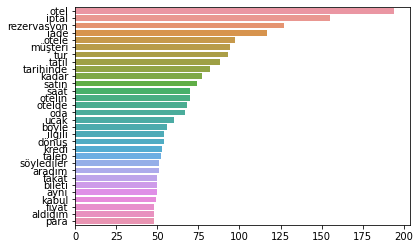

In [19]:
from collections import Counter
import seaborn as sns

corpus=[]
new = sampled['Text'].str.split()
new = new.values.tolist()
corpus=[word for i in new for word in i]

common_words = ['setur', 'turizm', 'ile',
                'için', 've', 'bir',
                'bu', 'da', 'daha',
                'gibi', 'gün', 'çok',
                'sonra', 'ama', 'ben',
                'önce', 'yok', 'diye',
                'bana', 'olarak', 'her',
                'şey', 'olan', 'hiçbir',
                'şekilde', 'olduğunu',
                'rağmen', 'var', 'ancak',
                'seturun', 'seturdan',
                #'otelin', 'otele', 'otelde',
                'üzerinden', 'başka', 'aldım']

from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in common_words:
        dic[word] += 1

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:30]:
    if (word not in common_words):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

Top bi-grams

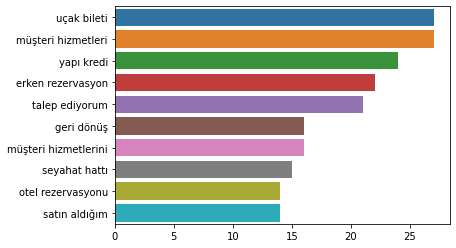

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_tri_grams=get_top_ngram(sampled['Text'],n=2)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

Top tri-grams

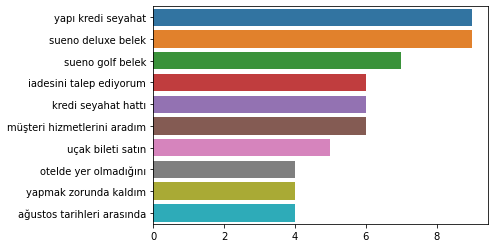

In [21]:
top_tri_grams=get_top_ngram(sampled['Text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

# Frequent words of per month

In [22]:
from collections import Counter
for u,v in sampled.set_index(sampled['datetime']).groupby(pd.Grouper(freq="M")):
    words=sum(v['Text'].str.split(' ').values.tolist(),[])
    c = Counter(words)
    print (u, c.most_common(10))

2017-02-28 00:00:00 [('red', 5), ('kabul', 3), ('ayında', 2), ('vize', 2), ('başvurusunda', 2), ('hatalı', 2), ('geldi', 2), ('konsolosluk', 2), ('yıl', 2), ('reddi', 2)]
2017-03-31 00:00:00 []
2017-04-30 00:00:00 [('dönüş', 7), ('vize', 5), ('kadar', 4), ('kontrol', 4), ('adios', 3), ('otel', 3), ('rezervasyonu', 3), ('hala', 3), ('müşteri', 3), ('ertesi', 3)]
2017-05-31 00:00:00 [('sueno', 15), ('belek', 15), ('otelin', 10), ('golf', 10), ('deluxe', 8), ('rezervasyon', 7), ('voucher', 7), ('belgemde', 7), ('diğer', 7), ('tatil', 6)]
2017-06-30 00:00:00 [('iptal', 5), ('genel', 4), ('aradım', 3), ('merkez', 3), ('kredi', 2), ('sürekli', 2), ('mayıs', 2), ('kişilik', 2), ('iade', 2), ('bayi', 2)]
2017-07-31 00:00:00 [('vize', 8), ('dakika', 6), ('para', 6), ('kişi', 6), ('tur', 6), ('otel', 5), ('bedeli', 5), ('bekledikten', 4), ('hizmet', 4), ('eskişehir', 3)]
2017-08-31 00:00:00 [('otelin', 6), ('temmuz', 5), ('otelde', 5), ('olması', 5), ('kadar', 4), ('büyük', 4), ('iptal', 3), ('g

**Things we have seen so far bring us to unsupervised methods.**


**Unsupervised methods include clustering and topic modeling etc.**

# **Let's start with topic modeling and well-known LDA**

In [23]:
import gensim.corpora as corpora
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

common_words = ['setur', 'turizm', 'ile',
                'için', 've', 'bir',
                'bu', 'da', 'daha',
                'gibi', 'gün', 'çok',
                'sonra', 'ama', 'ben',
                'önce', 'yok', 'diye',
                'bana', 'olarak', 'her',
                'şey', 'olan', 'hiçbir',
                'şekilde', 'olduğunu',
                'rağmen', 'var', 'ancak']

def remove_words(x):
    return " ".join([i for i in x.split() if i not in common_words])

sampled['Text'] = sampled['Text'].apply(lambda x: remove_words(x))

# Create Dictionary
texts_dictionary = Dictionary([i.split() for i in sampled['Text']])
# Create Corpus
texts_corpus = [texts_dictionary.doc2bow(text) for text in [i.split() for i in sampled['Text']]]

texts_model = LdaModel( 
    texts_corpus, 
    id2word = texts_dictionary, 
    num_topics = 5,
    passes = 20)

texts_model.show_topics()

[(0,
  '0.007*"iade" + 0.005*"otel" + 0.005*"rezervasyon" + 0.004*"iptal" + 0.004*"otele" + 0.004*"müşteri" + 0.004*"tur" + 0.003*"bilet" + 0.003*"kabul" + 0.003*"aynı"'),
 (1,
  '0.012*"otel" + 0.008*"rezervasyon" + 0.005*"otele" + 0.005*"müşteri" + 0.005*"iptal" + 0.004*"fiyat" + 0.004*"saat" + 0.004*"tarihinde" + 0.004*"tatil" + 0.004*"kadar"'),
 (2,
  '0.004*"iptal" + 0.004*"vize" + 0.004*"otel" + 0.004*"uçak" + 0.004*"iade" + 0.003*"taksit" + 0.003*"müşteri" + 0.003*"benim" + 0.003*"ilgili" + 0.003*"bilgi"'),
 (3,
  '0.008*"iptal" + 0.006*"tur" + 0.004*"otel" + 0.004*"tatil" + 0.003*"rezervasyon" + 0.003*"aradım" + 0.003*"sadece" + 0.003*"biz" + 0.002*"aldık" + 0.002*"saat"'),
 (4,
  '0.006*"otel" + 0.004*"iade" + 0.004*"iptal" + 0.004*"otelde" + 0.004*"oda" + 0.004*"satın" + 0.004*"tur" + 0.003*"rezervasyon" + 0.003*"olduğu" + 0.003*"söylediler"')]

In [ ]:
pip install pyLDAvis

In [5]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(texts_model, texts_corpus, texts_dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


# Clustering

Lets start with vectorizing comments and cluster those documents with the help of correspondant vectors. All credits to http://brandonrose.org/clustering

In [ ]:
#http://brandonrose.org/clustering

import nltk
#nltk.download('punkt')


## There was stemming process before, but now it doesnt stem. 
## It remains because i dont want to change the structure
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [t for t in filtered_tokens]
    return stems


def tokenize_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

totalvocab_stemmed = []
totalvocab_tokenized = []
for i in sampled['Text']:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, max_features=200000,
                                 min_df=0.05, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(sampled['Text'])

terms = tfidf_vectorizer.get_feature_names()
terms

In [88]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

dic = {'text': sampled['Text'].values, 'cluster': clusters, 'title': sampled['title'].values}

frame = pd.DataFrame(dic, index = [clusters], columns = ['text', 'cluster', 'title'])
print(frame['cluster'].value_counts())
frame

1    79
2    77
0    61
3    60
4    25
Name: cluster, dtype: int64


,text,cluster,title
3,internet sitesinden gördüğüm fiyat müşteri tem...,3,Setur Turizm Yapı Kredi Seyahat Hattı Adios Pu...
3,seturcomdan ocak tarihli otel rezervasyonu yap...,3,Setur Turizm Fatura Göndermemesi
1,günlük rezervasyonla konaklamaya başladığım od...,1,Setur Turizm Park Dedeman Bostancı Ve Setur
4,zubizu uçak bileti kampanyası vardı aldık bile...,4,Setur Turizm 25 TL Servis Ücreti Adı Altında Ü...
3,sarp sınır kapısında faaliyet gösteren dutyfre...,3,Setur Turizm Personelinden Yakışmayan Davranış
...,...,...,...
3,benim adıma vize başvurusu yapmak anlaşmış old...,3,Setur Turizm Vize İşlemleri Sıkıntısı!
3,firmasının kampanyasından yararlanmak nisan ta...,3,Setur Turizm ve Adios Seyahat Hattı Fiyaskosu!
3,dün saat görüştüm adios kampanyası dahilinde o...,3,Setur Turizm Otel Rezervasyonu Yaptıramıyorum
3,numarası otel rezervasyonu yaptırdım müşteri h...,3,Setur Turizm Müşteri Hizmetleri İlgisizliği



# Kmeans clustered our comments, lets check the top words of each comments


In [90]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace

    print("Cluster %d comments:" % i, end='')
    for title in frame.loc[i]['text'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: tur, turu, geri, bizi, böyle, bize,

Cluster 0 titles: Setur Turizm Şirkete Fatura Kesilmiyormuş., Setur Müşteriye Önem Vermiyor, Setur Turizm Tüketicinin Yanlış Bilgi Verilerek Aldatılması, Setur Tatil Öneri Güvensizliği, Setur Turizm Çaresizliği!, Setur Turizm Balayı Tatilimizin İlk Günü Çöp Oldu, Setur Olmayan Tur Organizasyonu, Setur Turizm Kendi Hatalarına Rağmen Kampanyadan Faydalanamadım, Setur Turizm Marinada Mescit Yok, Setur Ayvalık Marina Yaklaşım, Setur Turizm Havaalanı Transfer Problemi, Setur Turizm İletişim Cevap Vermiyor, Setur Turizm Covid Salgını Nedeniyle İptal, Setur Turizm Rezervasyon İptali Yapmadı!, Setur Turizm Müşteri Temsilcisi İlgisiz Tavrı, Setur Turizm İnternet Sitesi Çok Kötü!, Setur Turizm Mağduriyeti, Setur Turizm Laranaz Usa Büyük Amerika Turu!, Setur'un Şikayete Verdiği Çığır Açan Cevabı!, Setur Turizm Para İadesi Yapılmaması ve Telefonlarına Ulaşamama, Setur Turizm Setur Yurt Dışı Turları, Setur Turizm İle Doğu

# Visualizing for better understanding


In [91]:
import os 

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity


MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

dist = 1 - cosine_similarity(tfidf_matrix)

pos = mds.fit_transform(dist)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

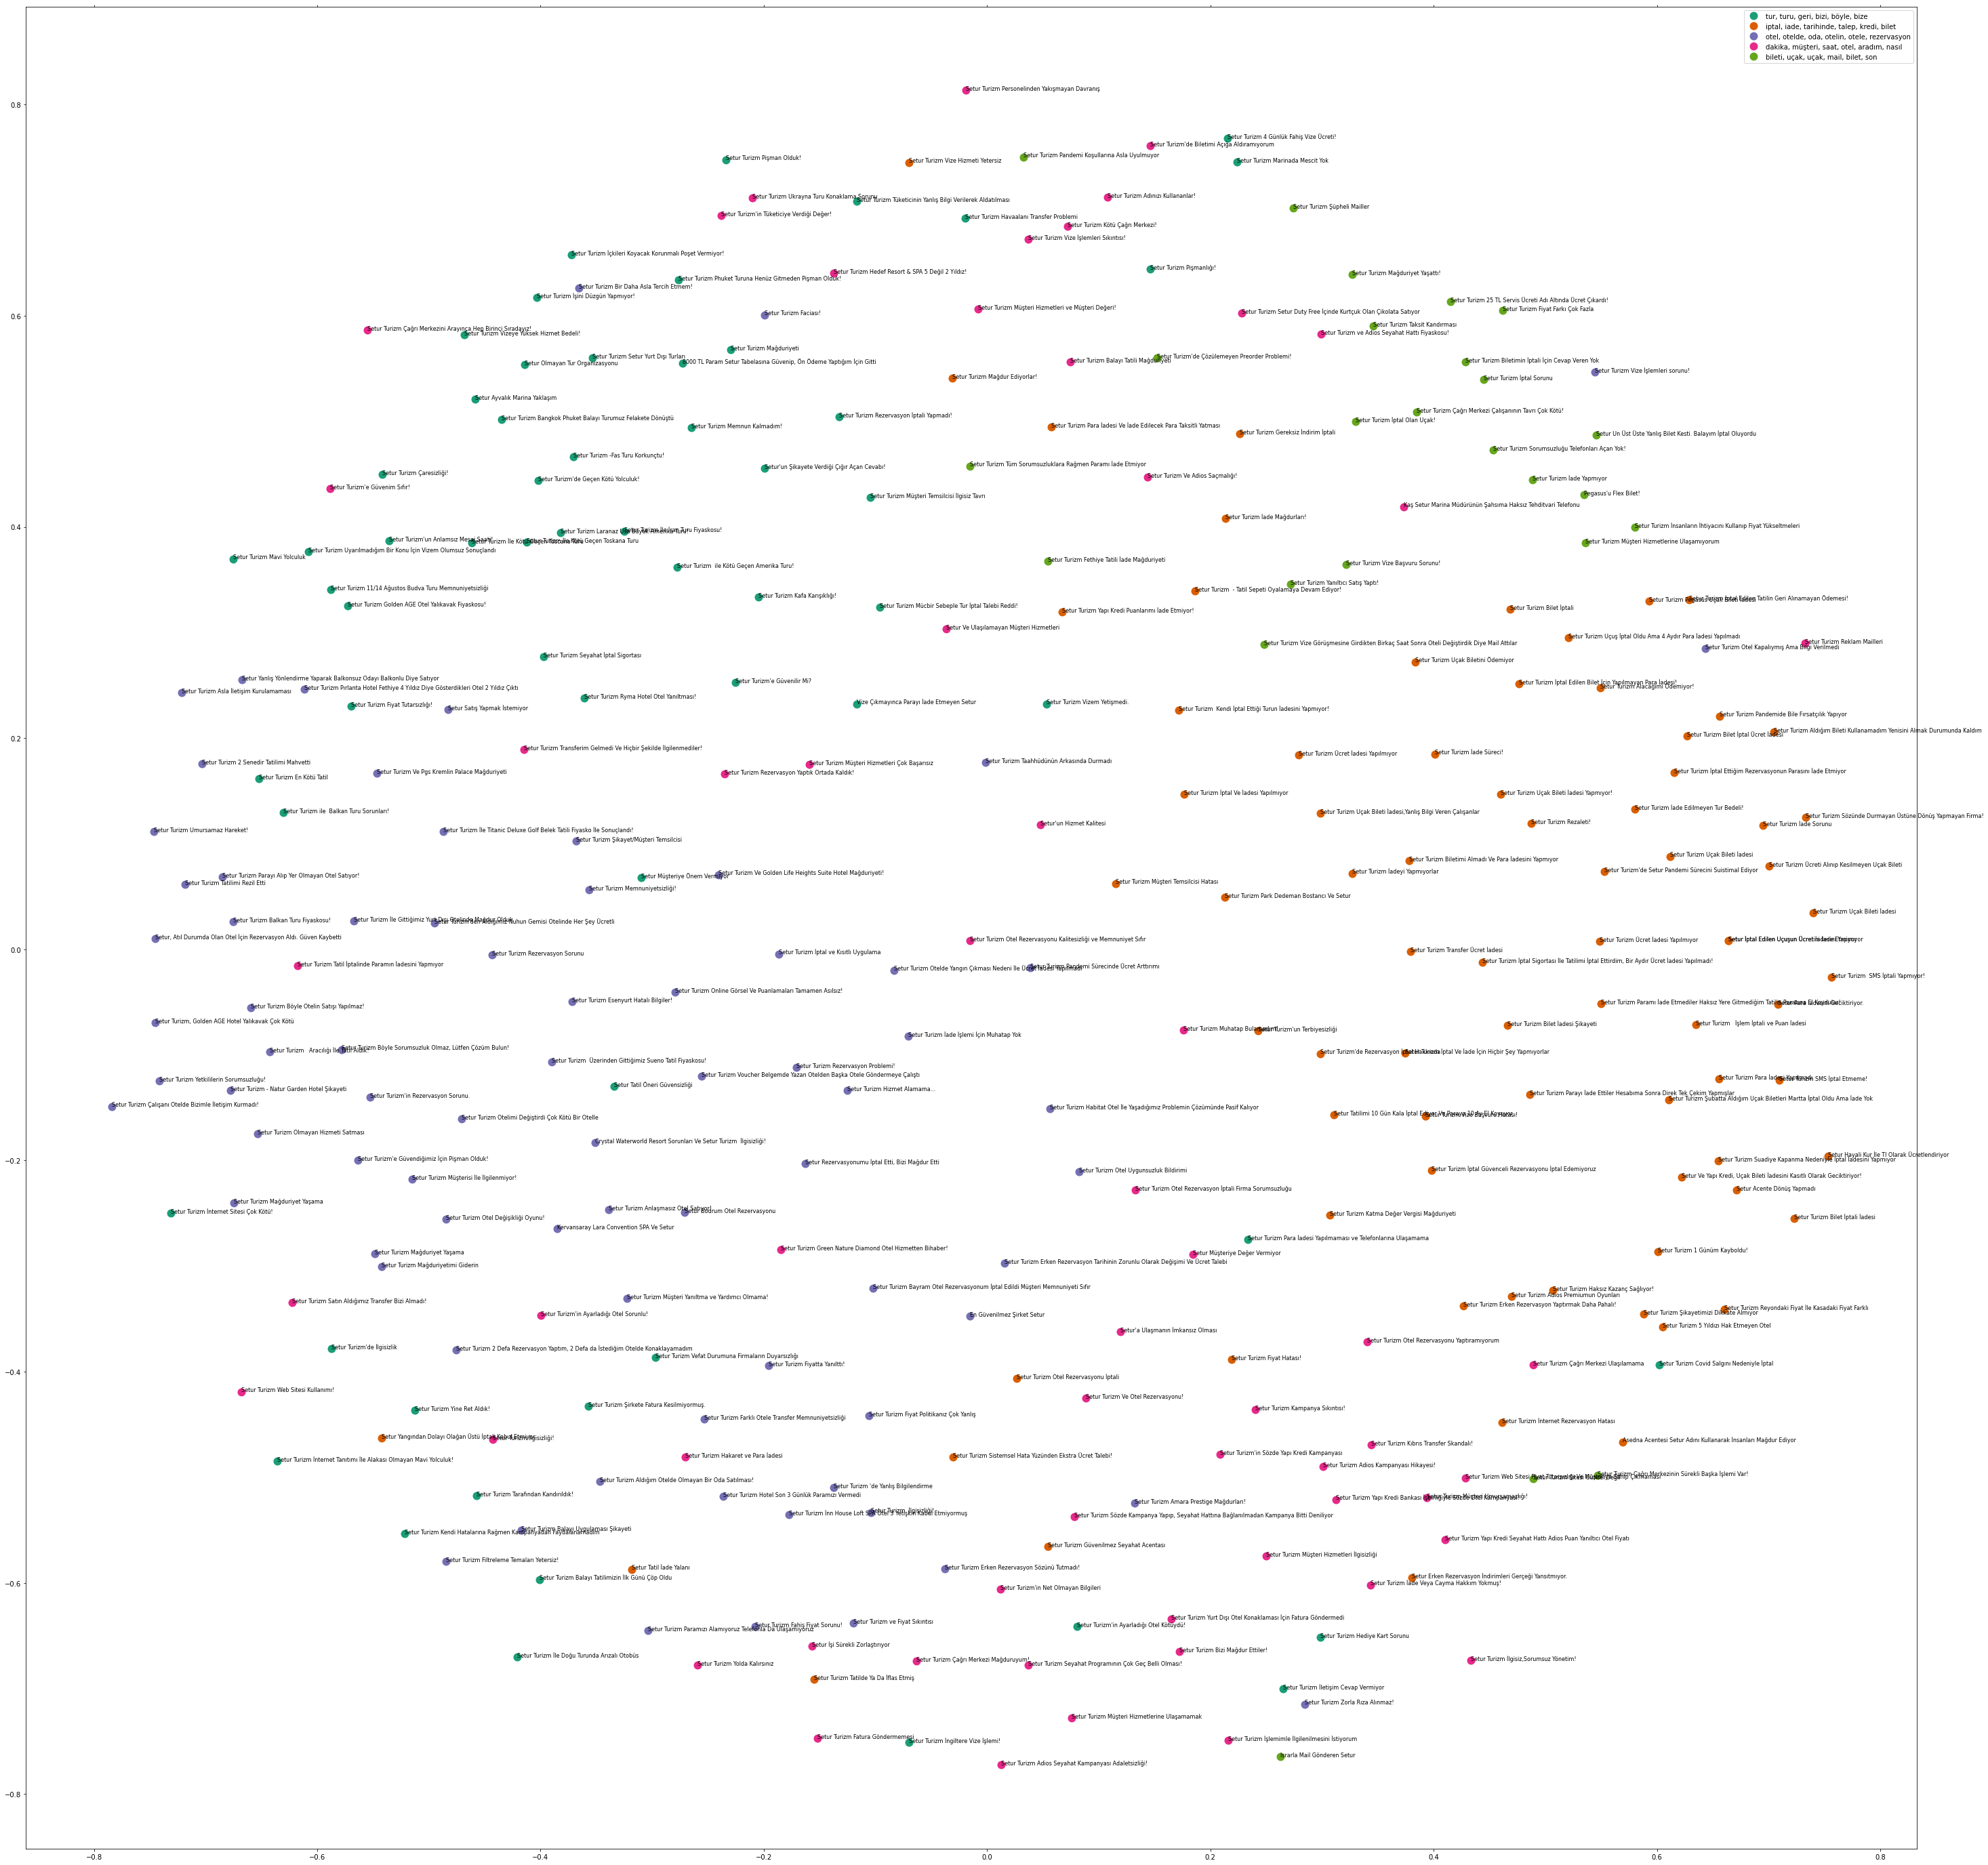

In [93]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'tur, turu, geri, bizi, böyle, bize', 
                 1: 'iptal, iade, tarihinde, talep, kredi, bilet',
                 2: 'otel, otelde, oda, otelin, otele, rezervasyon',
                 3: 'dakika, müşteri, saat, otel, aradım, nasıl',
                 4: 'bileti, uçak, uçak, mail, bilet, son'}


#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=sampled['title'])) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(50, 50)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

    
    
plt.show() #show the plot

**VISUALIZE MORE!**

**Results are pretty better than i expected**

In [104]:
import mpld3

#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=sampled['title'])) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: 10px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(True)
    ax.axes.get_yaxis().set_visible(True)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display()

# Word2vec embeddings

In [11]:
from gensim.models import word2vec

data = sampled['Text']

corpus = [i.split(" ") for i in data]
model = word2vec.Word2Vec(corpus, size=100, min_count=30)

**Saving word2vec model and converting it to the tsv files.**

**There will be two tsv files after execution of cell which are tensor and metadata files.**

**You can load this tsv files into << projector.tensorflow.org >> which helps to visualize embeddings.**

In [12]:
model.wv.save_word2vec_format('model_name')
!python -m gensim.scripts.word2vec2tensor --input model_name --output model_name

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


2022-01-14 11:10:55,651 - word2vec2tensor - INFO - running /usr/local/lib/python3.7/dist-packages/gensim/scripts/word2vec2tensor.py --input model_name --output model_name
2022-01-14 11:10:55,651 - utils_any2vec - INFO - loading projection weights from model_name
2022-01-14 11:10:55,658 - utils_any2vec - INFO - loaded (88, 100) matrix from model_name
2022-01-14 11:10:55,666 - word2vec2tensor - INFO - 2D tensor file saved to model_name_tensor.tsv
2022-01-14 11:10:55,666 - word2vec2tensor - INFO - Tensor metadata file saved to model_name_metadata.tsv
2022-01-14 11:10:55,666 - word2vec2tensor - INFO - finished running word2vec2tensor.py


In [142]:
def vectorize(list_of_docs, model):
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(sampled['Text'], model=model)
len(vectorized_docs), len(vectorized_docs[0])

(302, 100)

In [143]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

km.fit(vectorized_docs)

clusters = km.labels_.tolist()

dic = {'text': sampled['Text'].values, 'cluster': clusters, 'title': sampled['title'].values}

frame = pd.DataFrame(dic, index = [clusters], columns = ['text', 'cluster', 'title'])
print(frame['cluster'].value_counts())
frame

0    302
Name: cluster, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  import sys


,text,cluster,title
0,internet sitesinden gördüğüm fiyat müşteri tem...,0,Setur Turizm Yapı Kredi Seyahat Hattı Adios Pu...
0,seturcomdan ocak tarihli otel rezervasyonu yap...,0,Setur Turizm Fatura Göndermemesi
0,günlük rezervasyonla konaklamaya başladığım od...,0,Setur Turizm Park Dedeman Bostancı Ve Setur
0,zubizu uçak bileti kampanyası vardı aldık bile...,0,Setur Turizm 25 TL Servis Ücreti Adı Altında Ü...
0,sarp sınır kapısında faaliyet gösteren dutyfre...,0,Setur Turizm Personelinden Yakışmayan Davranış
...,...,...,...
0,benim adıma vize başvurusu yapmak anlaşmış old...,0,Setur Turizm Vize İşlemleri Sıkıntısı!
0,firmasının kampanyasından yararlanmak nisan ta...,0,Setur Turizm ve Adios Seyahat Hattı Fiyaskosu!
0,dün saat görüştüm adios kampanyası dahilinde o...,0,Setur Turizm Otel Rezervasyonu Yaptıramıyorum
0,numarası otel rezervasyonu yaptırdım müşteri h...,0,Setur Turizm Müşteri Hizmetleri İlgisizliği


In [134]:
model[model.wv.vocab].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(921, 300)

In [132]:
tfidf_matrix.shape

(302, 184)